label
0    1000
1      50
2      50
Name: count, dtype: int64

,user,0,1,2,3,4,5,6,7,8,...,1009,1010,1011,1013,1014,1015,1016,1017,1018,label
0,1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1101,1.0,-10.0,-10.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,1102,10.0,10.0,0.0,10.0,0.0,0.0,0.0,1.0,1.0,...,0.0,10.0,0.0,0.0,10.0,0.0,0.0,1.0,10.0,0
3,1103,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1106,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,1107,1.0,0.0,0.0,1.0,10.0,0.0,1.0,1.0,-10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,1109,0.0,0.0,0.0,-10.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


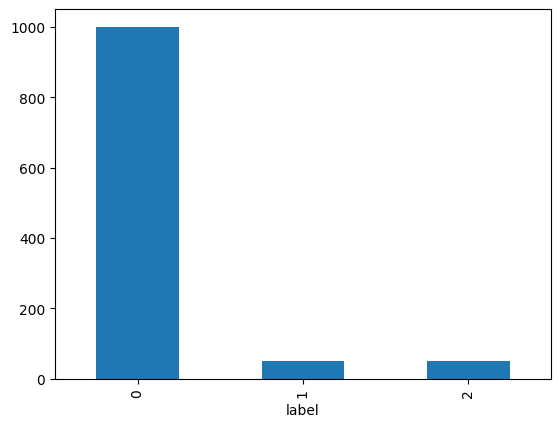

In [51]:
# Taken from Milton's Data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

def load_normal_week1_users():
    data1 = np.load("first_batch_multi_labels.npz")

    XX1 = pd.DataFrame(data1["X"])
    yy1 = pd.DataFrame(data1["yy"])
    XX1.rename(columns={0: "user", 1: "item", 2: "rating"}, inplace=True)
    yy1.rename(columns={0: "user", 1: "label"}, inplace=True)
    XX1 = XX1.pivot_table(index = 'user', columns='item', values = 'rating').fillna(0)
    df = pd.merge(XX1, yy1, left_on = 'user', right_on = 'user')
    df = df[df.label == 0]
    fig, ax = plt.subplots()
    new_df = pd.DataFrame()
    new_df['neutral'] = (df == 0).sum(axis = 1)
    new_df['watched'] = (df == 1).sum(axis = 1)
    new_df['dislike'] = (df == -10).sum(axis = 1)
    new_df['like'] = (df == 10).sum(axis = 1)
    # new_df['total'] = df['neutral'] + df['watched'] + df['like'] + df['dislike']
    new_df['total'] = new_df['like'] + new_df['dislike'] + new_df['watched']
    new_df['like-prop'] = np.log(new_df['like'] + 1) - np.log(new_df['total'] + 1)
    new_df['dislike-prop'] = np.log(new_df['dislike'] + 1) - np.log(new_df['total'] + 1)
    new_df['watched-prop'] = np.log(new_df['watched'] + 1) - np.log(new_df['total'] + 1)
    new_df['label'] = df['label']
    # df['label'] = yy1
    # new_df = new_df.drop(['neutral', 'like', 'watched', 'dislike', 'like', 'total'], axis = 1)
    
    return new_df

def load_dataset():
    data = np.load("second_batch_multi_labels.npz")
    X = pd.DataFrame(data["X"])
    y = pd.DataFrame(data["y"])
    yy = pd.DataFrame(data["yy"])
    
    X = data["X"]
    y = data["yy"]
    
    XX = pd.DataFrame(X)
    yy = pd.DataFrame(y)
    XX.rename(columns={0: "user", 1: "item", 2: "rating"}, inplace=True)
    yy.rename(columns={0: "user", 1: "label"}, inplace=True)
    
    # Combine the two dataframes where the user is the same
    # merged_df = pd.merge(XX, yy, on="user")
    XX = XX.pivot_table(index = 'user', columns='item', values = 'rating').fillna(0)
    merged_df = pd.merge(XX, yy, left_on = 'user', right_on = 'user')
    fig, ax = plt.subplots()
    merged_df['label'].value_counts().plot(ax=ax, kind = 'bar')
    display(merged_df['label'].value_counts())
    
    return merged_df
    
merged_df = load_dataset()
merged_df.head(20)

,like-prop,dislike-prop,watched-prop
0,-1.203973,-1.655958,-0.640037
1,-1.223775,-2.022283,-0.505936
2,-0.992553,-1.466337,-0.885307
3,-1.321756,-1.495028,-0.651598
4,-1.295046,-2.571339,-0.411855
...,...,...,...
1095,-1.645156,-1.740466,-0.405465
1096,-0.893818,-2.174752,-0.648695
1097,-1.982815,-1.143064,-0.596520
1098,-1.761907,-3.208825,-0.213093


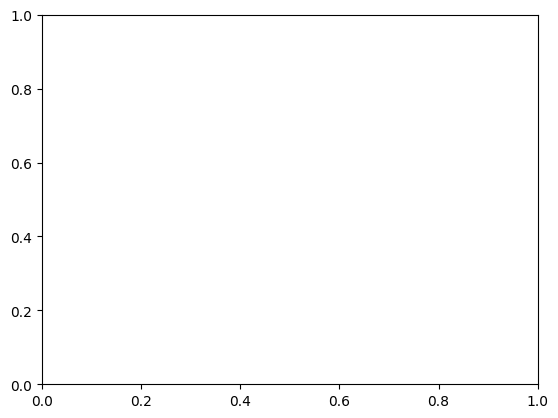

In [42]:
load_normal_week1_users()

In [25]:
def aggregate_user_ratings(df):
    df = copy.deepcopy(df)
    # df = df.drop('user')
    labels = df['label']
    df = df.drop('label', axis = 1)
    new_df = pd.DataFrame()
    new_df['neutral'] = (df == 0).sum(axis = 1)
    new_df['watched'] = (df == 1).sum(axis = 1)
    new_df['dislike'] = (df == -10).sum(axis = 1)
    new_df['like'] = (df == 10).sum(axis = 1)
    new_df['total'] = new_df['neutral'] + new_df['watched'] + new_df['like'] + new_df['dislike']
    new_df['label'] = labels
    return new_df
new_df = aggregate_user_ratings(merged_df)
new_df.head(20)

,neutral,watched,dislike,like,total,label
0,932,42,6,32,1012,0
1,620,241,76,75,1012,0
2,763,129,0,120,1012,0
3,935,39,3,35,1012,0
4,1002,6,2,2,1012,0
5,837,113,32,30,1012,0
6,855,82,7,68,1012,0
7,668,183,27,134,1012,0
8,992,16,1,3,1012,0
9,866,81,10,55,1012,0


In [26]:
freq0 = new_df[new_df.label == 0]
freq1 = new_df[new_df.label == 1]
freq2 = new_df[new_df.label == 2]

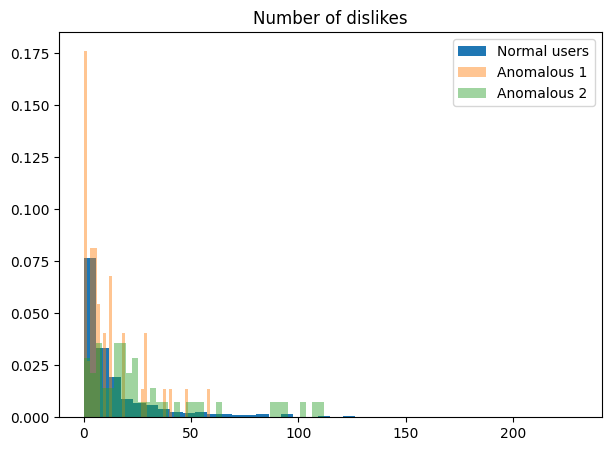

In [27]:
plt.figure(figsize=(7,5))
plt.hist(freq0['dislike'], density=True, bins = 40, label="Normal users")
plt.hist(freq1['dislike'], density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist(freq2['dislike'], density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
plt.title("Number of dislikes")
plt.show()

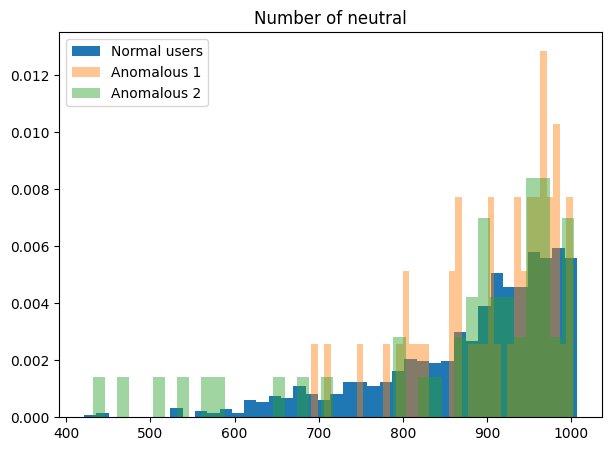

In [28]:
plt.figure(figsize=(7,5))
plt.hist(freq0['neutral'], density=True, bins = 40, label="Normal users")
plt.hist(freq1['neutral'], density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist(freq2['neutral'], density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
plt.title("Number of neutral")
plt.show()

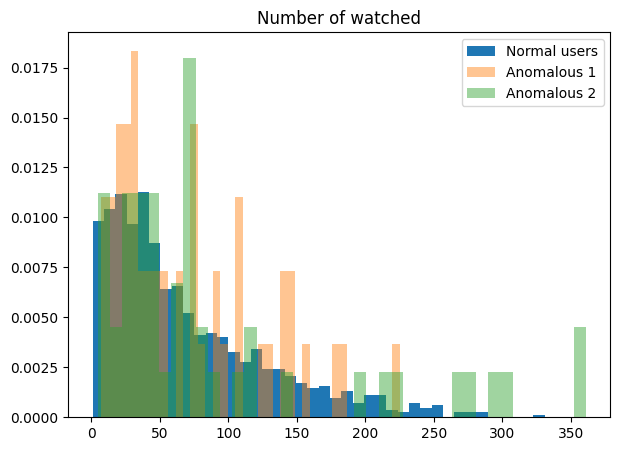

In [6]:
plt.figure(figsize=(7,5))
plt.hist(freq0['watched'], density=True, bins = 40, label="Normal users")
plt.hist(freq1['watched'], density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist(freq2['watched'], density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
plt.title("Number of watched")
plt.show()

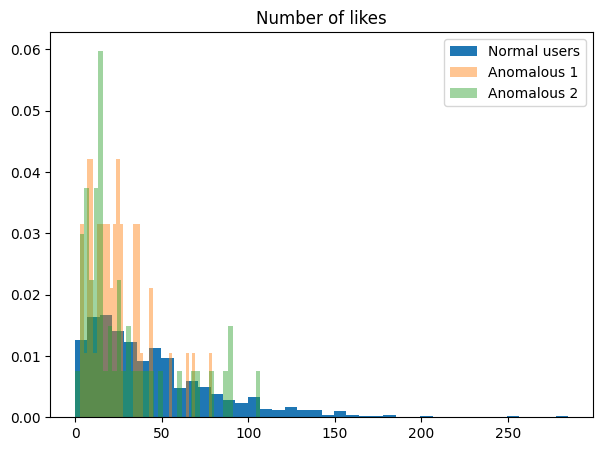

In [7]:
plt.figure(figsize=(7,5))
plt.hist(freq0['like'], density=True, bins = 40, label="Normal users")
plt.hist(freq1['like'], density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist(freq2['like'], density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
plt.title("Number of likes")
plt.show()

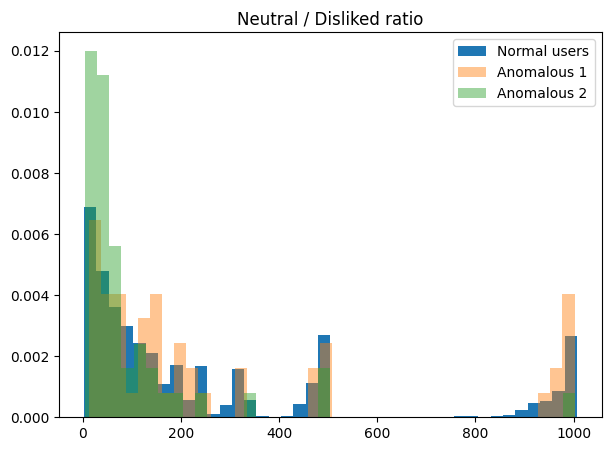

In [8]:
plt.figure(figsize=(7,5))
plt.hist(freq0['neutral']/(freq0['dislike'] + 1), density=True, bins = 40, label="Normal users")
plt.hist(freq1['neutral']/(freq1['dislike'] + 1), density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist(freq2['neutral']/(freq2['dislike'] + 1), density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
# plt.xlim(0,100)
plt.title("Neutral / Disliked ratio")
plt.show()

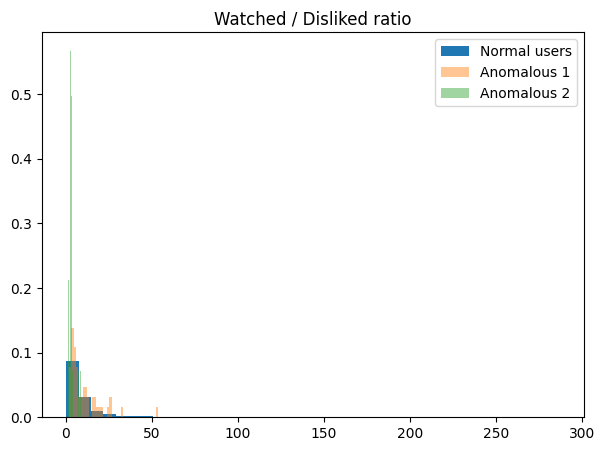

In [9]:
plt.figure(figsize=(7,5))
plt.hist(freq0['watched']/(freq0['dislike'] + 1), density=True, bins = 40, label="Normal users")
plt.hist(freq1['watched']/(freq1['dislike'] + 1), density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist(freq2['watched']/(freq2['dislike'] + 1), density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
# plt.xlim(0,100)
plt.title("Watched / Disliked ratio")
plt.show()

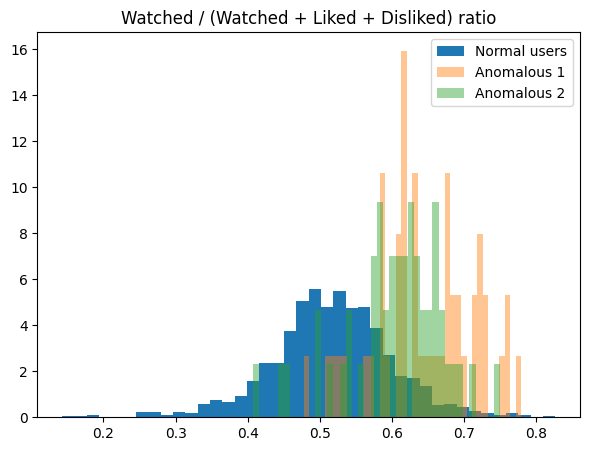

In [10]:
plt.figure(figsize=(7,5))
plt.hist(freq0['watched']/(freq0['watched']+freq0['like'] + freq0['dislike'] + 1), density=True, bins = 40, label="Normal users")
plt.hist(freq1['watched']/(freq1['watched']+freq1['like'] + freq1['dislike'] + 1), density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist(freq2['watched']/(freq2['watched']+freq2['like'] + freq2['dislike'] + 1), density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
# plt.xlim(0,100)
plt.title("Watched / (Watched + Liked + Disliked) ratio")
plt.show()

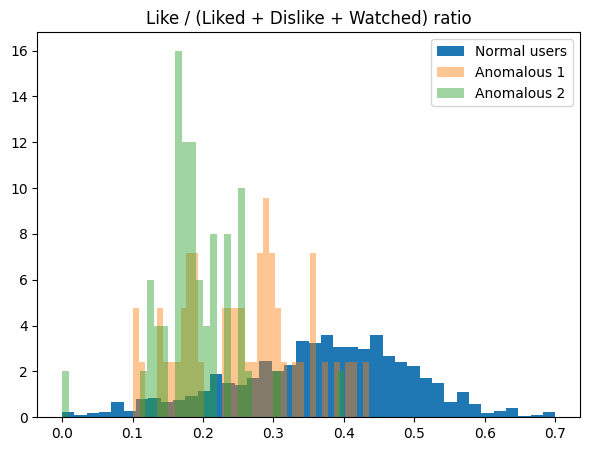

In [11]:
plt.figure(figsize=(7,5))
plt.hist(freq0['like']/(freq0['watched'] + freq0['like'] + freq0['dislike'] + 1), density=True, bins = 40, label="Normal users")
plt.hist(freq1['like']/(freq1['watched']+ freq1['like'] + freq1['dislike'] + 1), density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist(freq2['like']/(freq2['watched']+freq2['like'] + freq2['dislike'] + 1), density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
# plt.xlim(0,100)
plt.title("Like / (Liked + Dislike + Watched) ratio")
plt.show()

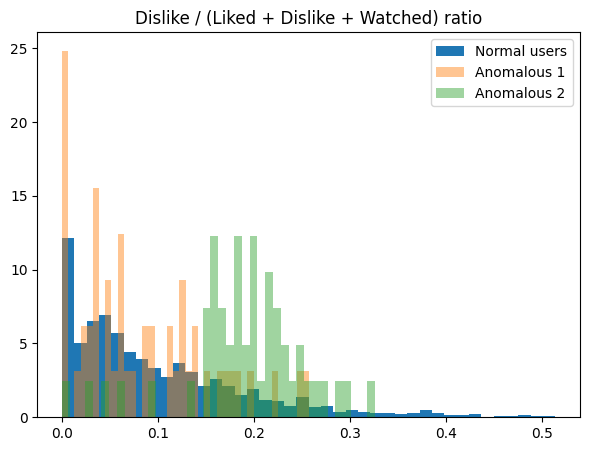

In [12]:
plt.figure(figsize=(7,5))
plt.hist(freq0['dislike']/(freq0['watched'] + freq0['like'] + freq0['dislike'] + 1), density=True, bins = 40, label="Normal users")
plt.hist(freq1['dislike']/(freq1['watched']+ freq1['like'] + freq1['dislike'] + 1), density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist(freq2['dislike']/(freq2['watched']+freq2['like'] + freq2['dislike'] + 1), density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
# plt.xlim(0,100)
plt.title("Dislike / (Liked + Dislike + Watched) ratio")
plt.show()

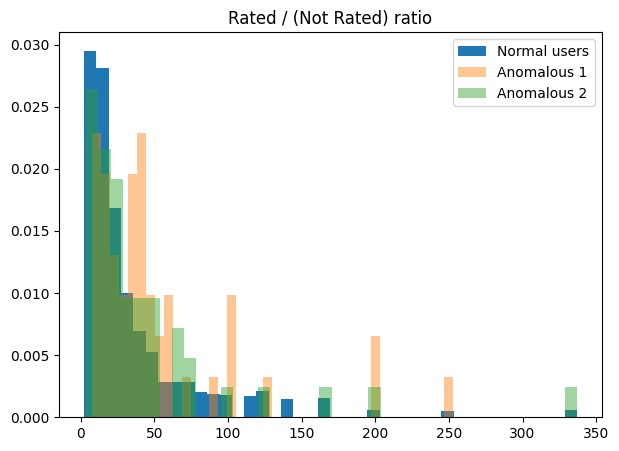

In [13]:
plt.figure(figsize=(7,5))
plt.hist((freq0['watched'] + freq0['neutral'] + 1)/(freq0['like'] + freq0['dislike'] + 1), density=True, bins = 40, label="Normal users")
plt.hist((freq1['watched'] + freq1['neutral'] + 1)/(freq1['like'] + freq1['dislike'] + 1), density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist((freq2['watched'] + freq2['neutral'] + 1)/(freq2['like'] + freq2['dislike'] + 1), density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
# plt.xlim(0,100)
plt.title("Rated / (Not Rated) ratio")
plt.show()

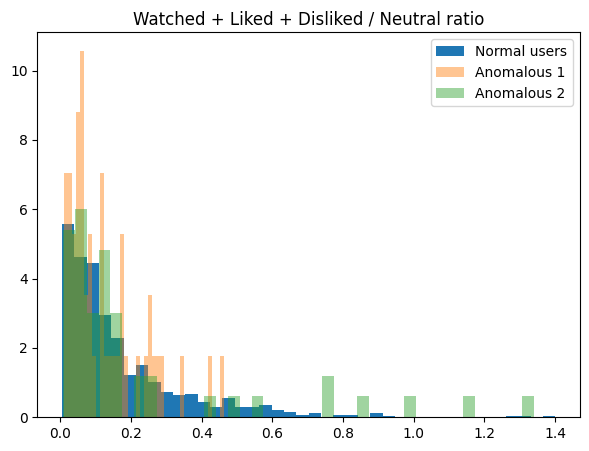

In [14]:
plt.figure(figsize=(7,5))
plt.hist((freq0['watched'] + freq0['like'] + freq0['dislike']) / (freq0['neutral'] + 1), density=True, bins = 40, label="Normal users")
plt.hist((freq1['watched'] + freq1['like'] + freq1['dislike']) / (freq1['neutral'] + 1), density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist((freq2['watched'] + freq2['like'] + freq2['dislike']) / (freq2['neutral'] + 1), density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
# plt.xlim(0,100)
plt.title("Watched + Liked + Disliked / Neutral ratio")
plt.show()

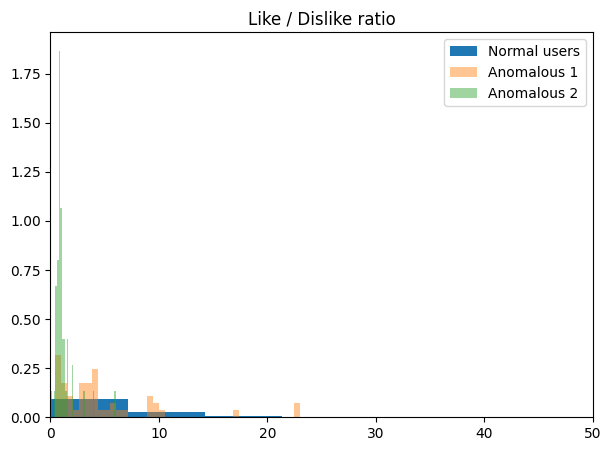

In [15]:
plt.figure(figsize=(7,5))
plt.hist((freq0['like']) / (freq0['dislike'] + 1), density=True, bins = 40, label="Normal users")
plt.hist((freq1['like']) / (freq1['dislike'] + 1), density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist((freq2['like']) / (freq2['dislike'] + 1), density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
plt.xlim(0,50)
plt.title("Like / Dislike ratio")
plt.show()

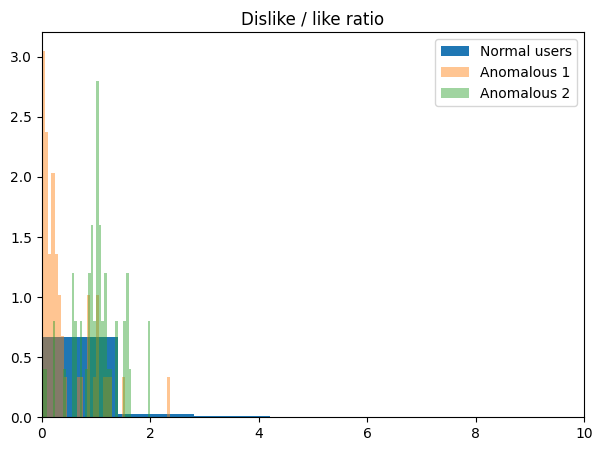

In [16]:
plt.figure(figsize=(7,5))
plt.hist((freq0['dislike']) / (freq0['like'] + 1), density=True, bins = 40, label="Normal users")
plt.hist((freq1['dislike']) / (freq1['like'] + 1), density=True, bins = 40, label="Anomalous 1", alpha = 0.45)
plt.hist((freq2['dislike']) / (freq2['like'] + 1), density=True, bins = 40, label="Anomalous 2", alpha = 0.45)
plt.legend()
plt.xlim(0,10)
plt.title("Dislike / like ratio")
plt.show()

In [29]:
def plot_roc_curve(fprs, tprs, roc_aucs, title):
    import matplotlib.pyplot as plt
    plt.figure()
    # colors = ['blue', 'green', 'red']
    colors = ['blue', 'green']
    for i, color in zip(fprs, colors):
        plt.plot(fprs[i], tprs[i], label = f'Class{i} (AUC = {roc_aucs[i]:.3f})')

    plt.plot([0,1],[0,1], linestyle = '--', alpha = 0.5)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {title}')
    plt.legend(loc = 'lower right')
    plt.show()

X1 =  Index(['neutral', 'watched', 'dislike', 'like', 'total', 'like-prop',
       'dislike-prop', 'watched-prop', 'label'],
      dtype='object')
df =  Index(['neutral', 'watched', 'dislike', 'like', 'total', 'label', 'like-prop',
       'dislike-prop', 'watched-prop'],
      dtype='object')


,neutral,watched,dislike,like,total,label,like-prop,dislike-prop,watched-prop
0,932,42,6,32,80,0,-0.897942,-2.448539,-0.633249
1,620,241,76,75,392,0,-1.643076,-1.630004,-0.484872
2,763,129,0,120,249,0,-0.725670,-5.521461,-0.653926
3,935,39,3,35,77,0,-0.773190,-2.970414,-0.667829
4,1002,6,2,2,10,0,-1.299283,-1.299283,-0.451985


,like-prop,dislike-prop,watched-prop
0,-0.897942,-2.448539,-0.633249
1,-1.643076,-1.630004,-0.484872
2,-0.725670,-5.521461,-0.653926
3,-0.773190,-2.970414,-0.667829
4,-1.299283,-1.299283,-0.451985


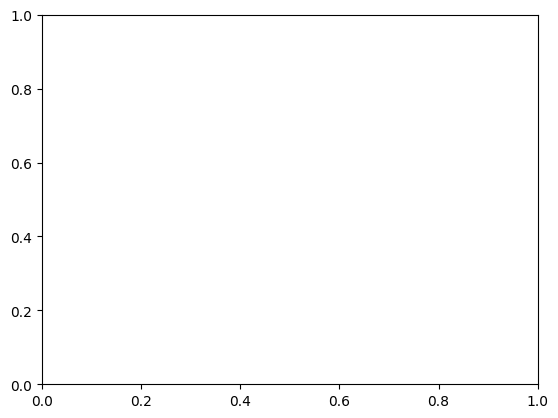

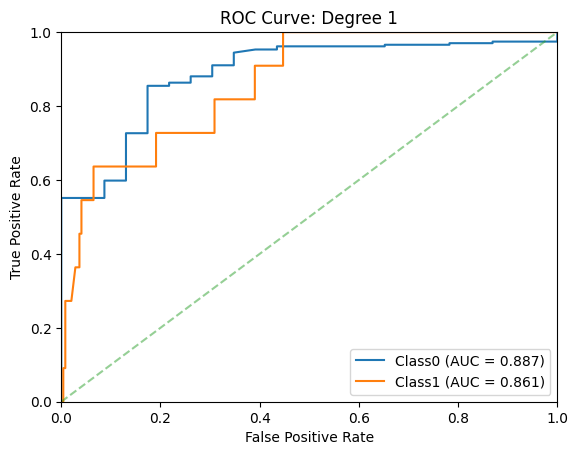

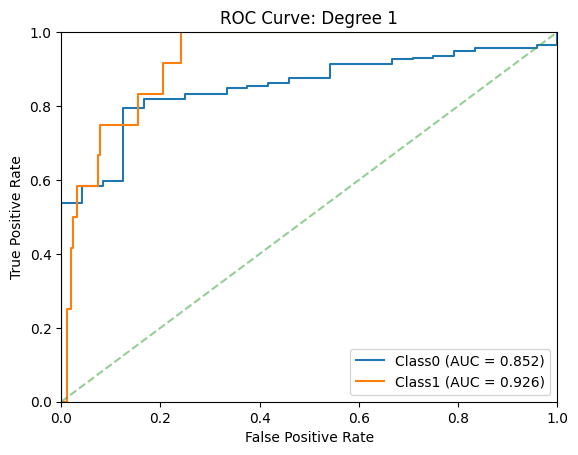

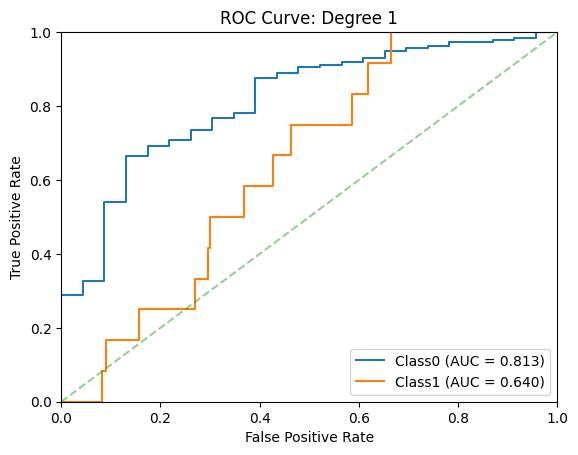

{1: {'Fold_0': {0: 0.8872166480862134,
   1: 0.8614190687361418,
   2: 0.8197278911564625},
  'Fold_1': {0: 0.8522889842632332,
   1: 0.9261904761904762,
   2: 0.8761904761904762},
  'Fold_2': {0: 0.8133980220190334,
   1: 0.6400273224043715,
   2: 0.8630797773654917},
  'Mean_AUC_0': 0.8509678847894934,
  'Mean_AUC_1': 0.8092122891103298,
  'Mean_AUC_2': 0.8529993815708101,
  'Mean_AUC': 0.8377265184902111}}

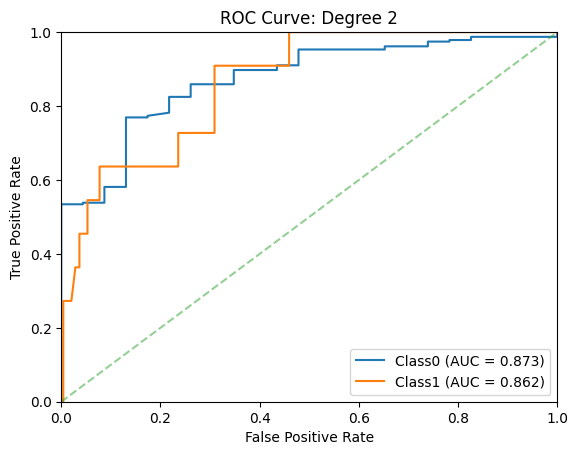

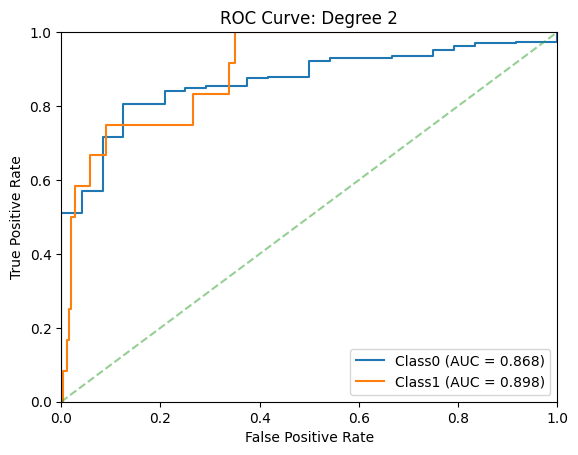

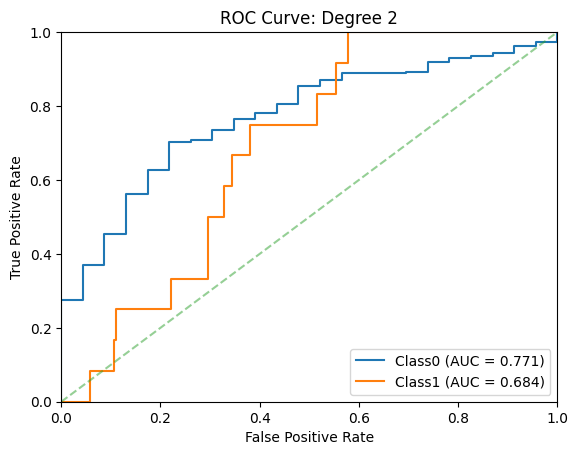

{1: {'Fold_0': {0: 0.8872166480862134,
   1: 0.8614190687361418,
   2: 0.8197278911564625},
  'Fold_1': {0: 0.8522889842632332,
   1: 0.9261904761904762,
   2: 0.8761904761904762},
  'Fold_2': {0: 0.8133980220190334,
   1: 0.6400273224043715,
   2: 0.8630797773654917},
  'Mean_AUC_0': 0.8509678847894934,
  'Mean_AUC_1': 0.8092122891103298,
  'Mean_AUC_2': 0.8529993815708101,
  'Mean_AUC': 0.8377265184902111},
 2: {'Fold_0': {0: 0.8732813080639168,
   1: 0.8621581670362158,
   2: 0.8625850340136054},
  'Fold_1': {0: 0.8682045779685263,
   1: 0.8979591836734694,
   2: 0.8925170068027211},
  'Fold_2': {0: 0.771039373017354,
   1: 0.6844262295081966,
   2: 0.8656771799628943},
  'Mean_AUC_0': 0.8375084196832657,
  'Mean_AUC_1': 0.8148478600726273,
  'Mean_AUC_2': 0.8735930735930736,
  'Mean_AUC': 0.8419831177829888}}

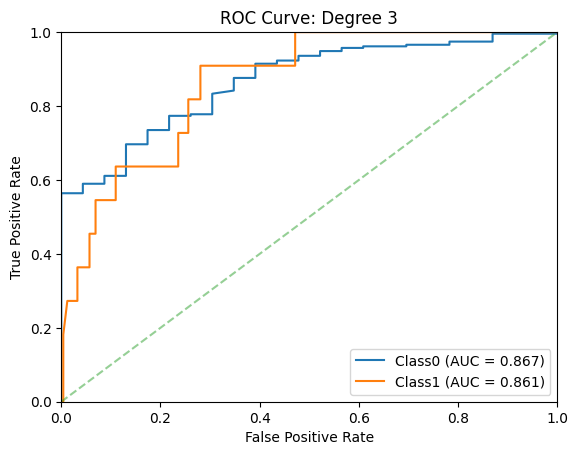

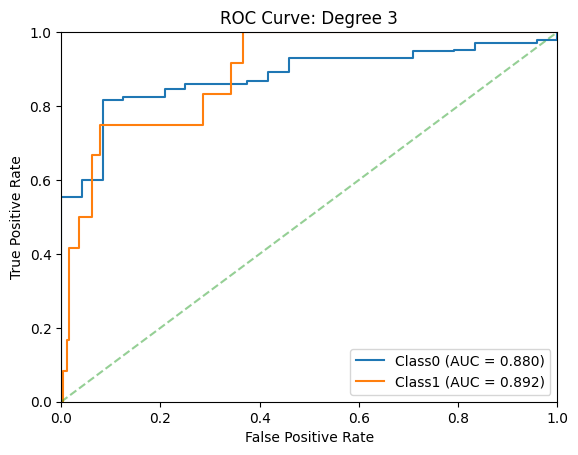

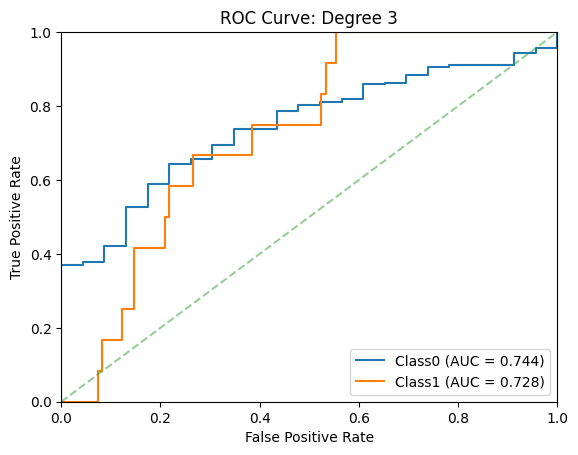

{1: {'Fold_0': {0: 0.8872166480862134,
   1: 0.8614190687361418,
   2: 0.8197278911564625},
  'Fold_1': {0: 0.8522889842632332,
   1: 0.9261904761904762,
   2: 0.8761904761904762},
  'Fold_2': {0: 0.8133980220190334,
   1: 0.6400273224043715,
   2: 0.8630797773654917},
  'Mean_AUC_0': 0.8509678847894934,
  'Mean_AUC_1': 0.8092122891103298,
  'Mean_AUC_2': 0.8529993815708101,
  'Mean_AUC': 0.8377265184902111},
 2: {'Fold_0': {0: 0.8732813080639168,
   1: 0.8621581670362158,
   2: 0.8625850340136054},
  'Fold_1': {0: 0.8682045779685263,
   1: 0.8979591836734694,
   2: 0.8925170068027211},
  'Fold_2': {0: 0.771039373017354,
   1: 0.6844262295081966,
   2: 0.8656771799628943},
  'Mean_AUC_0': 0.8375084196832657,
  'Mean_AUC_1': 0.8148478600726273,
  'Mean_AUC_2': 0.8735930735930736,
  'Mean_AUC': 0.8419831177829888},
 3: {'Fold_0': {0: 0.8665923448532143,
   1: 0.861049519586105,
   2: 0.8622448979591837},
  'Fold_1': {0: 0.8801859799713876,
   1: 0.8918367346938776,
   2: 0.91156462585034

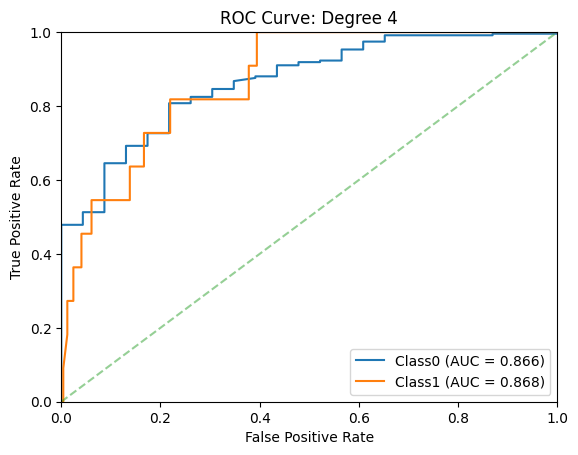

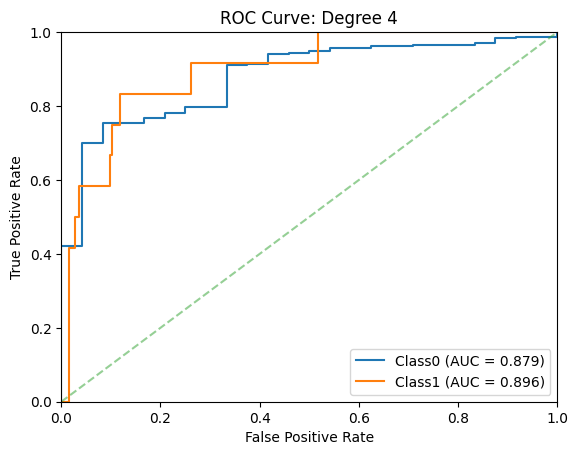

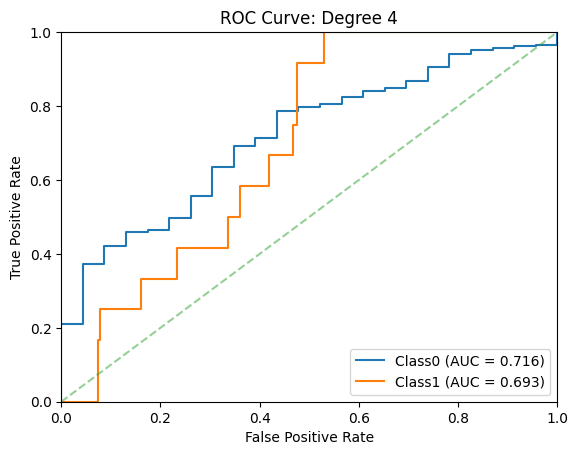

{1: {'Fold_0': {0: 0.8872166480862134,
   1: 0.8614190687361418,
   2: 0.8197278911564625},
  'Fold_1': {0: 0.8522889842632332,
   1: 0.9261904761904762,
   2: 0.8761904761904762},
  'Fold_2': {0: 0.8133980220190334,
   1: 0.6400273224043715,
   2: 0.8630797773654917},
  'Mean_AUC_0': 0.8509678847894934,
  'Mean_AUC_1': 0.8092122891103298,
  'Mean_AUC_2': 0.8529993815708101,
  'Mean_AUC': 0.8377265184902111},
 2: {'Fold_0': {0: 0.8732813080639168,
   1: 0.8621581670362158,
   2: 0.8625850340136054},
  'Fold_1': {0: 0.8682045779685263,
   1: 0.8979591836734694,
   2: 0.8925170068027211},
  'Fold_2': {0: 0.771039373017354,
   1: 0.6844262295081966,
   2: 0.8656771799628943},
  'Mean_AUC_0': 0.8375084196832657,
  'Mean_AUC_1': 0.8148478600726273,
  'Mean_AUC_2': 0.8735930735930736,
  'Mean_AUC': 0.8419831177829888},
 3: {'Fold_0': {0: 0.8665923448532143,
   1: 0.861049519586105,
   2: 0.8622448979591837},
  'Fold_1': {0: 0.8801859799713876,
   1: 0.8918367346938776,
   2: 0.91156462585034

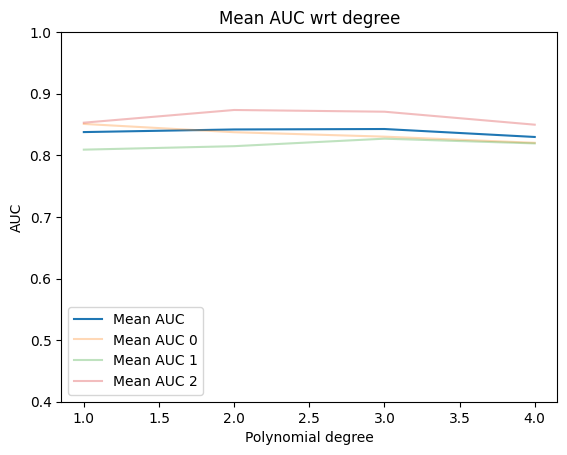

In [52]:
from collections import namedtuple
DataSplit = namedtuple('DataSplit', ['X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test'])
def data_processing(df):
    from sklearn.model_selection import train_test_split
    
    df = copy.deepcopy(df)
    df['total'] = df['like'] + df['dislike'] + df['watched']
    df['like-prop'] = np.log(df['like'] + 1) - np.log(df['total'] + 1)
    df['dislike-prop'] = np.log(df['dislike'] + 1) - np.log(df['total'] + 1)
    df['watched-prop'] = np.log(df['watched'] + 1) - np.log(df['total'] + 1)
    # df['like-to-dislike'] = np.log(df['like'] + 1) - np.log(df['dislike'] + 1)
    # df['like-odds'] = np.log(df['like'] + 1) - np.log(df['total'] - df['like'] + 1)
    # df['dislike-odds'] = np.log(df['dislike'] + 1) - np.log(df['total'] - df['dislike'] + 1)
    # df['watched-odds'] = np.log(df['watched'] + 1) - np.log(df['total'] - df['watched'] + 1)
    X1 = load_normal_week1_users()
    print("X1 = ", X1.columns)
    # df = pd.concat([df,X1])
    print("df = ", df.columns)
    display(df.head())
    y = df['label']
    
    X = df.drop(['total', 'like', 'dislike', 'watched', 'neutral', 'label'], axis = 1)
    display(X.head(5))
    Xs, X_test, ys, y_test = train_test_split(X, y, random_state=41123123, test_size=0.3, stratify=y)
    return DataSplit(Xs, None, X_test, ys, None, y_test)

def evaluate_model(lr, X, y, degree):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    y_prob = lr.predict_proba(X)
    y_binarized = label_binarize(y, classes = [0,1,2])
    fprs = {}
    tprs = {}
    roc_aucs = {}
    for i in range(3):
        fprs[i], tprs[i], _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_aucs[i] = auc(fprs[i], tprs[i])
    plot_roc_curve(fprs, tprs, roc_aucs, f'Degree {degree}')
    return roc_aucs

def baseline_model(df, degree):
    from sklearn.model_selection import train_test_split, StratifiedKFold
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, auc
    from imblearn.over_sampling import SMOTE
    from sklearn.ensemble import RandomForestClassifier
    import statistics

    split = data_processing(df)
    skf = StratifiedKFold(n_splits=3, shuffle = True, random_state=123125312)
    # skf.get_n_splits(split.Xs, split.ys)
    results = {}
    for i in range(1,degree+1):
        degree_results = {}
        for j, (train_idx, val_idx) in enumerate(skf.split(split.X_train, split.y_train)):
            X_train, X_val, y_train, y_val = split.X_train.iloc[train_idx], split.X_train.iloc[val_idx], split.y_train.iloc[train_idx], split.y_train.iloc[val_idx]
            # Add all week 1 samples into X_train
            # display(X_train)
            # display(y_train)

            # Over sample minority classes
            sm = SMOTE(sampling_strategy='not majority', random_state=41231314)
            X_train, y_train = sm.fit_resample(X_train, y_train)

            sc = StandardScaler().fit(X_train)
            X_train_norm = sc.transform(X_train)
            X_val_norm = sc.transform(X_val)

            X_train_norm = np.clip(X_train_norm, a_min = -2, a_max=2)
            X_val_norm = np.clip(X_val_norm, a_min=-2, a_max=2)
            
            if i > 1:
                poly = PolynomialFeatures(degree = i).fit(X_train_norm, X_val_norm)
                X_train_poly = poly.transform(X_train_norm)
                X_val_poly = poly.transform(X_val_norm)
    
                sc2 = StandardScaler().fit(X_train_poly, y_train)
                X_train_poly_norm = sc2.transform(X_train_poly)
                X_val_poly_norm = sc2.transform(X_val_poly)

                X_train_final = np.clip(X_train_poly_norm, a_min = -2, a_max = 2)
                X_val_final = np.clip(X_val_poly_norm, a_min = -2, a_max = 2)
                # X_train_final = X_train_poly
                # X_val_final = X_val_poly
            else:
                X_train_final = copy.deepcopy(X_train_norm)
                X_val_final = copy.deepcopy(X_val_norm)

            lr = LogisticRegression(class_weight='balanced').fit(X_train_final, y_train)
            # clf = RandomForestClassifier(n_estimators=200, max_depth = 30, min_samples_split=3, random_state=1200102, class_weight='balanced').fit(X_train_final, y_train)
            roc_aucs = evaluate_model(lr, X_val_final, y_val, i)
            # roc_aucs = evaluate_model(clf, X_val_final, y_val, i)
            degree_results[f'Fold_{j}'] = {
                0: roc_aucs[0],
                1: roc_aucs[1],
                2: roc_aucs[2]
            }
        degree_results['Mean_AUC_0'] = statistics.mean([degree_results[f'Fold_{k}'][0] for k in range(3)])
        degree_results['Mean_AUC_1'] = statistics.mean([degree_results[f'Fold_{k}'][1] for k in range(3)])
        degree_results['Mean_AUC_2'] = statistics.mean([degree_results[f'Fold_{k}'][2] for k in range(3)])
        degree_results['Mean_AUC'] = statistics.mean([degree_results[f'Mean_AUC_{k}'] for k in range(3)])
        results[i] = copy.deepcopy(degree_results)
        display(results)
    plt.figure()
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC'] for i in range(1,degree + 1)], label = 'Mean AUC')
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_0'] for i in range(1, degree + 1)], label = 'Mean AUC 0', alpha = 0.3)
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_1'] for i in range(1, degree + 1)], label = 'Mean AUC 1', alpha = 0.3)
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_2'] for i in range(1, degree + 1)], label = 'Mean AUC 2', alpha = 0.3)
    plt.title('Mean AUC wrt degree')
    plt.xlabel('Polynomial degree')
    plt.ylabel('AUC')
    plt.ylim([0.4, 1.0])
    plt.legend()
    # plt.savefig(f"./poly-log-reg-kfold.png")
    plt.show()
    return pd.DataFrame(results)
    # pass

# split = data_processing(new_df)
results = baseline_model(new_df, degree = 4)

In [19]:
results

,1,2,3,4,5,6
Fold_0,"{0: 0.8872166480862134, 1: 0.8614190687361418,...","{0: 0.8732813080639168, 1: 0.8621581670362158,...","{0: 0.8665923448532143, 1: 0.861049519586105, ...","{0: 0.8656633221850614, 1: 0.8684405025868439,...","{0: 0.8680787811222593, 1: 0.8861788617886178,...","{0: 0.866778149386845, 1: 0.8847006651884699, ..."
Fold_1,"{0: 0.8522889842632332, 1: 0.9261904761904762,...","{0: 0.8682045779685263, 1: 0.8979591836734694,...","{0: 0.8801859799713876, 1: 0.8918367346938776,...","{0: 0.8789341917024321, 1: 0.8962585034013606,...","{0: 0.8880543633762519, 1: 0.9149659863945578,...","{0: 0.8857296137339057, 1: 0.9105442176870748,..."
Fold_2,"{0: 0.8133980220190334, 1: 0.6400273224043715,...","{0: 0.771039373017354, 1: 0.6844262295081966, ...","{0: 0.7441686881880948, 1: 0.7281420765027322,...","{0: 0.7163649934689307, 1: 0.6933060109289617,...","{0: 0.7165515954469117, 1: 0.6950136612021858,...","{0: 0.7169247994028737, 1: 0.6823770491803278,..."
Mean_AUC_0,0.850968,0.837508,0.830316,0.820321,0.824228,0.823144
Mean_AUC_1,0.809212,0.814848,0.827009,0.819335,0.832053,0.825874
Mean_AUC_2,0.852999,0.873593,0.8708,0.849732,0.846372,0.844012
Mean_AUC,0.837727,0.841983,0.842708,0.829796,0.834218,0.83101


In [20]:
split.X_train

NameError: name 'split' is not defined

In [ ]:
from collections import namedtuple
DataSplit = namedtuple('DataSplit', ['X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test'])
def data_processing_binary_class(df):
    from sklearn.model_selection import train_test_split
    
    df = copy.deepcopy(df)
    df['total'] = df['like'] + df['dislike'] + df['watched']
    df['like-prop'] = np.log(df['like'] + 1) - np.log(df['total'] + 1)
    df['dislike-prop'] = np.log(df['dislike'] + 1) - np.log(df['total'] + 1)
    df['watched-prop'] = np.log(df['watched'] + 1) - np.log(df['total'] + 1)
    # df['like-to-dislike'] = np.log(df['like'] + 1) - np.log(df['dislike'] + 1)
    # df['like-odds'] = np.log(df['like'] + 1) - np.log(df['total'] - df['like'] + 1)
    # df['dislike-odds'] = np.log(df['dislike'] + 1) - np.log(df['total'] - df['dislike'] + 1)
    # df['watched-odds'] = np.log(df['watched'] + 1) - np.log(df['total'] - df['watched'] + 1)
    y = df['label']
    y = pd.Series([(1 if x != 0 else 0) for x in y])
    # convert into binary classification
    X = df.drop(['total', 'like', 'dislike', 'watched', 'neutral', 'label'], axis = 1)
    display(X.head(5))
    Xs, X_test, ys, y_test = train_test_split(X, y, random_state=41123123, test_size=0.3, stratify=y)
    return DataSplit(Xs, None, X_test, ys, None, y_test)

def evaluate_model(lr, X, y, degree):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    y_prob = lr.predict_proba(X)
    y_binarized = label_binarize(y, classes = [0,1,2])
    fprs = {}
    tprs = {}
    roc_aucs = {}
    for i in range(2):
        fprs[i], tprs[i], _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_aucs[i] = auc(fprs[i], tprs[i])
    plot_roc_curve(fprs, tprs, roc_aucs, f'Degree {degree}')
    return roc_aucs

def baseline_binary_class_model(df, degree):
    from sklearn.model_selection import train_test_split, StratifiedKFold
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, auc
    from imblearn.over_sampling import SMOTE
    from sklearn.ensemble import RandomForestClassifier
    import statistics

    split = data_processing_binary_class(df)
    skf = StratifiedKFold(n_splits=3, shuffle = True, random_state=123125312)
    # skf.get_n_splits(split.Xs, split.ys)
    results = {}
    for i in range(1,degree+1):
        degree_results = {}
        for j, (train_idx, val_idx) in enumerate(skf.split(split.X_train, split.y_train)):
            X_train, X_val, y_train, y_val = split.X_train.iloc[train_idx], split.X_train.iloc[val_idx], split.y_train.iloc[train_idx], split.y_train.iloc[val_idx]
            # display(X_train)
            # display(y_train)

            # Over sample minority classes
            # sm = SMOTE(sampling_strategy='not majority', random_state=41231314)
            # X_train, y_train = sm.fit_resample(X_train, y_train)

            
            sc = StandardScaler().fit(X_train)
            X_train_norm = sc.transform(X_train)
            X_val_norm = sc.transform(X_val)

            X_train_norm = np.clip(X_train_norm, a_min = -2, a_max=2)
            X_val_norm = np.clip(X_val_norm, a_min=-2, a_max=2)
            
            if i > 1:
                poly = PolynomialFeatures(degree = i).fit(X_train_norm, X_val_norm)
                X_train_poly = poly.transform(X_train_norm)
                X_val_poly = poly.transform(X_val_norm)
    
                sc2 = StandardScaler().fit(X_train_poly, y_train)
                X_train_poly_norm = sc2.transform(X_train_poly)
                X_val_poly_norm = sc2.transform(X_val_poly)

                X_train_final = np.clip(X_train_poly_norm, a_min = -2, a_max = 2)
                X_val_final = np.clip(X_val_poly_norm, a_min = -2, a_max = 2)
                # X_train_final = X_train_poly
                # X_val_final = X_val_poly
            else:
                X_train_final = copy.deepcopy(X_train_norm)
                X_val_final = copy.deepcopy(X_val_norm)

            lr = LogisticRegression(class_weight='balanced').fit(X_train_final, y_train)
            # clf = RandomForestClassifier(n_estimators=200, max_depth = 30, min_samples_split=3, random_state=1200102, class_weight='balanced').fit(X_train_final, y_train)
            roc_aucs = evaluate_model(lr, X_val_final, y_val, i)
            # roc_aucs = evaluate_model(clf, X_val_final, y_val, i)
            degree_results[f'Fold_{j}'] = {
                0: roc_aucs[0],
                1: roc_aucs[1],
                # 2: roc_aucs[2]
            }
        degree_results['Mean_AUC_0'] = statistics.mean([degree_results[f'Fold_{k}'][0] for k in range(3)])
        degree_results['Mean_AUC_1'] = statistics.mean([degree_results[f'Fold_{k}'][1] for k in range(3)])
        # degree_results['Mean_AUC_2'] = statistics.mean([degree_results[f'Fold_{k}'][2] for k in range(3)])
        degree_results['Mean_AUC'] = statistics.mean([degree_results[f'Mean_AUC_{k}'] for k in range(2)])
        results[i] = copy.deepcopy(degree_results)
        display(results)
    plt.figure()
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC'] for i in range(1,degree + 1)], label = 'Mean AUC')
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_0'] for i in range(1, degree + 1)], label = 'Mean AUC 0', alpha = 0.3)
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_1'] for i in range(1, degree + 1)], label = 'Mean AUC 1', alpha = 0.3)
    # plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_2'] for i in range(1, degree + 1)], label = 'Mean AUC 2', alpha = 0.3)
    plt.title('Mean AUC wrt degree')
    plt.xlabel('Polynomial degree')
    plt.ylabel('AUC')
    plt.ylim([0.4, 1.0])
    plt.legend()
    # plt.savefig(f"./poly-log-reg-kfold.png")
    plt.show()
    return pd.DataFrame(results)
    # pass

# split = data_processing(new_df)
results = baseline_binary_class_model(new_df, degree = 6)


In [ ]:
results

In [ ]:
def get_show_df(df, threshold):
    '''
    Output a few show IDs with majority likes or majority dislikes or majority watched
    
    '''
    df = copy.deepcopy(df)
    show_df = pd.DataFrame()
    df = df[df.label == 0] # don't care about anomalies
    show_df['neutral'] = (df == 0).sum(axis = 0)
    show_df['watched'] = (df == 1).sum(axis = 0)
    show_df['dislike'] = (df == -10).sum(axis = 0)
    show_df['like'] = (df == 10).sum(axis = 0)
    show_df = show_df.drop(['user', 'label'], axis = 0)
    show_df['total'] = show_df['watched'] + show_df['dislike'] + show_df['like']
    # display(show_df)
    # fig, ax = plt.subplots()
    # show_df[col_name].value_counts().plot(ax = ax, kind = 'hist')
    return disliked_ids, neutral_ids, liked_ids, watched_ids

In [ ]:
def get_show_majorities(df, thresholds):
    '''
    Output a few show IDs with majority likes or majority dislikes or majority watched
    
    '''
    df = copy.deepcopy(df)
    show_df = pd.DataFrame()
    df = df[df.label == 0] # don't care about anomalies
    show_df['neutral'] = (df == 0).sum(axis = 0)
    show_df['watched'] = (df == 1).sum(axis = 0)
    show_df['dislike'] = (df == -10).sum(axis = 0)
    show_df['like'] = (df == 10).sum(axis = 0)
    show_df = show_df.drop(['user', 'label'], axis = 0)
    show_df['total'] = show_df['neutral'] + show_df['watched'] + show_df['dislike'] + show_df['like']
    neutral_ids = show_df[(show_df.neutral / show_df.total) >= thresholds[0]].index.tolist()
    liked_ids = show_df[(show_df.like / show_df.total) >= thresholds[1]].index.tolist()
    watched_ids = show_df[(show_df.watched / show_df.total) >= thresholds[2]].index.tolist()
    disliked_ids = show_df[(show_df.dislike / show_df.total) >=thresholds[3]].index.tolist()
    
    # display(show_df)
    # fig, ax = plt.subplots()
    # show_df[col_name].value_counts().plot(ax = ax, kind = 'hist')
    return disliked_ids, neutral_ids, liked_ids, watched_ids
disliked_ids, neutral_ids, liked_ids, watched_ids = get_show_majorities(merged_df, [0.95, 0.05, 0.05, 0.05])

In [ ]:
liked_ids

In [ ]:
get_show_popularity(merged_df, "dislike", cls = 2)

In [ ]:
def process_merged_df(df, thresholds = [0.95, 0.05, 0.05, 0.05]):
    df = copy.deepcopy(df)
    disliked_ids, neutral_ids, liked_ids, watched_ids = get_show_majorities(df, thresholds)
    print("number of neutral = ", len(neutral_ids))
    print("number of liked = ", len(liked_ids))
    print("number of disliked = ", len(disliked_ids))
    print("number of watched = ", len(watched_ids))
    ### Assert that one film is in one category.
process_merged_df(merged_df)